# importing the required packages

In [169]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from bokeh.plotting import figure
import plotly.plotly as py
#import cufflinks as cf


# read the file

In [2]:
hr_data = pd.read_excel('data/HR-Employee-Attrition.xlsx')

In [3]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
hr_data.info() # dataset has 1470 obs and 35 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [284]:
obj_columns = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']

In [291]:
hr_data[obj_columns].head(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [292]:
hr_data.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [293]:
hr_data.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [294]:
hr_data.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [295]:
hr_data.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'], dtype=object)

In [299]:
hr_data.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [298]:
hr_data.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [5]:
len(hr_data.EmployeeNumber.unique())

1470

In [6]:
hr_data.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [7]:
hr_data.isnull().any() # have a complete dataset with no null values

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [8]:
hr_data.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [9]:
hr_data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

#### hr_data.groupby(['Education','EducationField']).size()

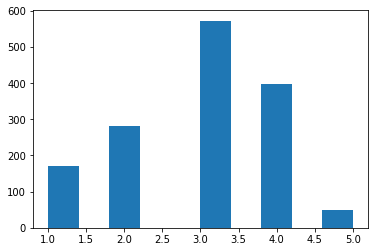

In [30]:
_ = plt.hist(hr_data.Education);
plt.show()

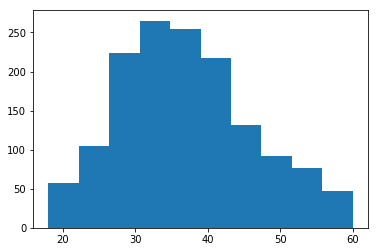

In [35]:
_ = plt.hist(hr_data.Age);
plt.show()

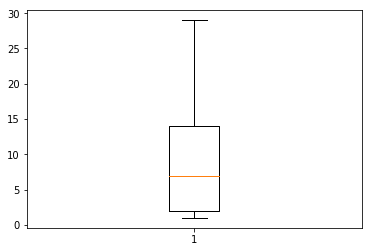

In [37]:
_ = plt.boxplot(hr_data.DistanceFromHome);
plt.show()

In [81]:
var = hr_data.groupby('Gender').MonthlyIncome.sum()

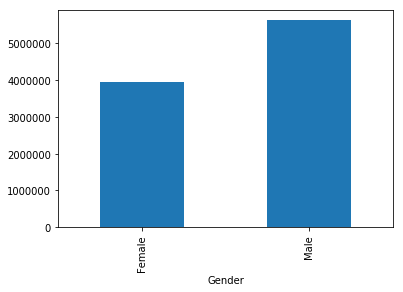

In [82]:
var.plot(kind='bar');

In [40]:
print("female employees : " , len(hr_data[hr_data.Gender=='Female']))

female employees :  588


In [41]:
len(hr_data)

1470

In [42]:
print("male employees: " , 1470 - 588 )


male employees:  882


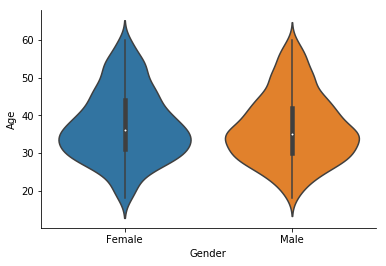

In [49]:
_ = sns.violinplot(hr_data['Gender'], hr_data['Age']);
sns.despine()
plt.show()


In [104]:
var = hr_data.groupby('BusinessTravel').Age.count()

In [105]:
var

BusinessTravel
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
Name: Age, dtype: int64

In [97]:
fig = plt.figure()

In [98]:
ax1 = fig.add_subplot(1,1,1)

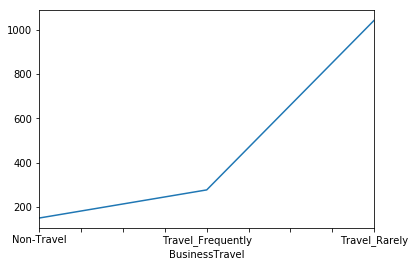

In [99]:
ax1.set_xlabel("Business Travel")
ax1.set_ylabel("Age ")
ax1.set_title("Businesss Wise Age Travel")
var.plot(kind='line');


In [77]:
hr_data.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [100]:
hr_data.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [106]:
var =hr_data.groupby(['EducationField','Gender']).EmployeeNumber.count()

In [107]:
var

EducationField    Gender
Human Resources   Female      8
                  Male       19
Life Sciences     Female    240
                  Male      366
Marketing         Female     69
                  Male       90
Medical           Female    190
                  Male      274
Other             Female     29
                  Male       53
Technical Degree  Female     52
                  Male       80
Name: EmployeeNumber, dtype: int64

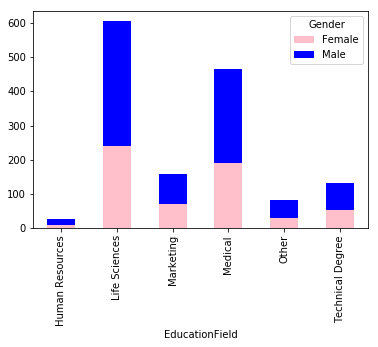

In [109]:
var.unstack().plot(kind='bar',stacked=True,grid=False,color=['pink','blue']);


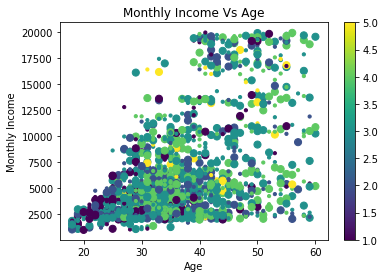

In [217]:
plt.scatter(data=hr_data,x='Age',y= 'MonthlyIncome',s=[10,50],c='Education')
plt.xlabel("Age")
plt.ylabel('Monthly Income')
plt.title("Monthly Income Vs Age")
plt.colorbar()
#plt.legend(['5 Doctor'])
plt.show()

In [124]:
hr_data[(hr_data.Age>= 30) & (hr_data.Age <=40)].MonthlyIncome.max()

19833

In [125]:
hr_data[(hr_data.Age >= 30) & (hr_data.Age <=40)].MonthlyIncome.min()

1081

In [122]:
hr_data.MonthlyIncome.min()

1009

In [123]:
hr_data.MonthlyIncome.max()

19999

In [197]:
hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# find out which Educationfield yields more income age wise


In [131]:
age_edu_wise_monthlyincome = hr_data.groupby(['Age','EducationField']).MonthlyIncome.agg(['max','min'])

In [137]:
age_edu_wise_monthlyincome

max    min
Age EducationField                
18  Life Sciences      1611   1051
    Marketing          1878   1878
    Medical            1904   1200
19  Life Sciences      2994   1102
    Marketing          1675   1675
    Medical            1859   1483
    Other              2121   2121
    Technical Degree   2564   2325
20  Life Sciences      3033   2728
    Marketing          2678   2323
    Medical            2783   1009
    Technical Degree   2973   2973
21  Life Sciences      2716   1232
    Marketing          2679   2679
    Medical            3230   2380
    Other              2693   2693
    Technical Degree   3447   2070
22  Life Sciences      4775   2328
    Medical            2935   2244
    Other              2814   2814
    Technical Degree   3894   2523
23  Life Sciences      2904   1223
    Marketing          1790   1790
    Medical            3989   2500
    Other              2647   2647
    Technical Degree   2322   2073
24  Human Resources    1555   1555
    Life Sciences      4617   2033
    Marketing          4260   4260
    Medical            4401   2145
...                     ...    ...
53  Medical           18606   4450
    Other             19094  19094
    Technical Degree  10169  10169
54  Human Resources   17328  17328
    Life Sciences     17779   2897
    Marketing          5940   5940
    Medical           19406   4440
    Technical Degree  13549  10739
55  Human Resources   19636  19636
    Life Sciences     16835   4035
    Marketing         19586  13695
    Medical           19859   5160
    Technical Degree   5415   2662
56  Life Sciences     19717   2066
    Marketing          5380   5380
    Medical           11103   2942
    Technical Degree  19943   2339
57  Life Sciences      9439   4900
    Marketing         14118  14118
    Medical            6755   6755
58  Life Sciences     19246   2372
    Medical           19701   3346
    Technical Degree  10552   2479
59  Human Resources   18844  18844
    Life Sciences     13726   2177
    Medical           10512   2267
    Technical Degree  11904  11904
60  Life Sciences     19566  19566
    Marketing         10266   5220
    Medical           10883  10883

[215 rows x 2 columns]

In [136]:
age_edu_wise_monthlyincome.loc[20]

,max,min
EducationField,,
Life Sciences,3033,2728
Marketing,2678,2323
Medical,2783,1009
Technical Degree,2973,2973


In [132]:
age_edu_wise_monthlyincome.loc[30]

,max,min
EducationField,,
Human Resources,6347,2180
Life Sciences,11416,2033
Marketing,7140,2983
Medical,11916,1081
Other,9957,7264
Technical Degree,9250,1274


In [133]:
age_edu_wise_monthlyincome.loc[40]

,max,min
EducationField,,
Life Sciences,18041,2018
Marketing,10855,5677
Medical,19833,2001
Other,10932,3975
Technical Degree,10322,3319


In [134]:
age_edu_wise_monthlyincome.loc[50]

,max,min
EducationField,,
Life Sciences,19926,2380
Marketing,19331,2683
Medical,19517,3221
Other,4728,4728
Technical Degree,10496,6796


In [135]:
age_edu_wise_monthlyincome.loc[60]

,max,min
EducationField,,
Life Sciences,19566,19566
Marketing,10266,5220
Medical,10883,10883


In [139]:
age_edu_wise_monthlyincome.loc[60,'Marketing']

max    10266
min     5220
Name: (60, Marketing), dtype: int64

In [143]:
age_edu_wise_monthlyincome.iloc[:20]

max   min
Age EducationField              
18  Life Sciences     1611  1051
    Marketing         1878  1878
    Medical           1904  1200
19  Life Sciences     2994  1102
    Marketing         1675  1675
    Medical           1859  1483
    Other             2121  2121
    Technical Degree  2564  2325
20  Life Sciences     3033  2728
    Marketing         2678  2323
    Medical           2783  1009
    Technical Degree  2973  2973
21  Life Sciences     2716  1232
    Marketing         2679  2679
    Medical           3230  2380
    Other             2693  2693
    Technical Degree  3447  2070
22  Life Sciences     4775  2328
    Medical           2935  2244
    Other             2814  2814

# life Sciences and medical field seems to yield more monthly income 


In [145]:
def age_group(df):
    if df['Age'] < 20:
        age_grp = 'Less than 20'
    elif df['Age'] < 30:
        age_grp = '20-30'
    elif df['Age'] < 40:
        age_grp = '30-40'
    elif df['Age'] < 50:
        age_grp = '40-50'
    else :
        age_grp = '50-60'
    return age_grp


In [146]:
hr_data['Age_grp'] = hr_data.apply(age_group,axis=1)

In [151]:
hr_data[hr_data[['Age','Age_grp']].Age== 18]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_grp
296,18,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,...,80,0,0,2,3,0,0,0,0,Less than 20
301,18,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,...,80,0,0,2,3,0,0,0,0,Less than 20
457,18,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,...,80,0,0,3,3,0,0,0,0,Less than 20
727,18,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,...,80,0,0,2,3,0,0,0,0,Less than 20
828,18,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,...,80,0,0,0,3,0,0,0,0,Less than 20
972,18,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,1368,...,80,0,0,5,4,0,0,0,0,Less than 20
1153,18,Yes,Travel_Frequently,544,Sales,3,2,Medical,1,1624,...,80,0,0,2,4,0,0,0,0,Less than 20
1311,18,No,Non-Travel,1431,Research & Development,14,3,Medical,1,1839,...,80,0,0,4,1,0,0,0,0,Less than 20


In [152]:
hr_data.DistanceFromHome.value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
12     20
17     20
13     19
22     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

# trying to plot with bokeh


In [158]:
hr_data[['JobLevel','JobSatisfaction','MonthlyIncome','MaritalStatus','DistanceFromHome','Age','Department','Gender']][:20]

,JobLevel,JobSatisfaction,MonthlyIncome,MaritalStatus,DistanceFromHome,Age,Department,Gender
0,2,4,5993,Single,1,41,Sales,Female
1,2,2,5130,Married,8,49,Research & Development,Male
2,1,3,2090,Single,2,37,Research & Development,Male
3,1,3,2909,Married,3,33,Research & Development,Female
4,1,2,3468,Married,2,27,Research & Development,Male
5,1,4,3068,Single,2,32,Research & Development,Male
6,1,1,2670,Married,3,59,Research & Development,Female
7,1,3,2693,Divorced,24,30,Research & Development,Male
8,3,3,9526,Single,23,38,Research & Development,Male
9,2,3,5237,Married,27,36,Research & Development,Male


In [185]:
dept_gen_mstatus_df = dict(hr_data.groupby(['Department','Gender','MaritalStatus']).size())

In [183]:
dept_df = hr_data[['Department','Gender','MaritalStatus']]

In [186]:
type(dept_gen_mstatus_df)

dict

In [188]:
dept_gen_mstatus_df


{('Human Resources', 'Female', 'Divorced'): 4,
 ('Human Resources', 'Female', 'Married'): 11,
 ('Human Resources', 'Female', 'Single'): 5,
 ('Human Resources', 'Male', 'Divorced'): 12,
 ('Human Resources', 'Male', 'Married'): 23,
 ('Human Resources', 'Male', 'Single'): 8,
 ('Research & Development', 'Female', 'Divorced'): 83,
 ('Research & Development', 'Female', 'Married'): 167,
 ('Research & Development', 'Female', 'Single'): 129,
 ('Research & Development', 'Male', 'Divorced'): 141,
 ('Research & Development', 'Male', 'Married'): 266,
 ('Research & Development', 'Male', 'Single'): 175,
 ('Sales', 'Female', 'Divorced'): 30,
 ('Sales', 'Female', 'Married'): 94,
 ('Sales', 'Female', 'Single'): 65,
 ('Sales', 'Male', 'Divorced'): 57,
 ('Sales', 'Male', 'Married'): 112,
 ('Sales', 'Male', 'Single'): 88}

In [300]:
hr_data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [202]:
hr_data.groupby(['Attrition','Gender','DistanceFromHome']).size()

Attrition  Gender  DistanceFromHome
No         Female  1                    76
                   2                    78
                   3                    30
                   4                    26
                   5                    18
                   6                    19
                   7                    27
                   8                    34
                   9                    16
                   10                   30
                   11                   14
                   12                    7
                   13                    5
                   14                    8
                   15                    9
                   16                   11
                   17                    6
                   18                    6
                   19                    3
                   20                    7
                   21                    6
                   22                    7
                  

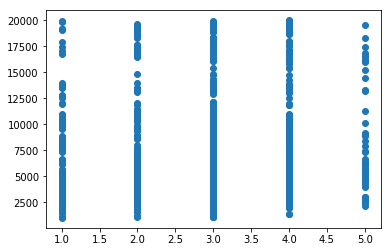

In [236]:
#fig,ax = plt.subplots()
plt.scatter(hr_data.Education,hr_data.MonthlyIncome)
#plt.scatter(hr_data.Education,hr_data.Age)
#ax[2].plot(hr_data.ucation, hr_data.Age)


# seaborn categorical plots

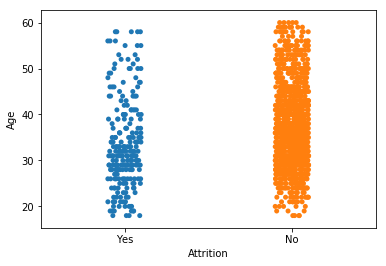

In [238]:
sns.stripplot(data=hr_data,x='Attrition',y='Age',jitter=True);

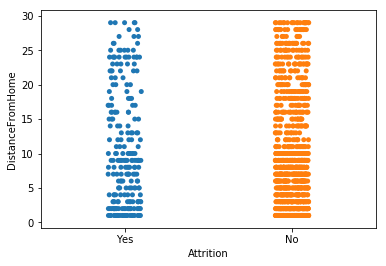

In [241]:
sns.stripplot(data=hr_data,x='Attrition',y='DistanceFromHome',jitter=True);

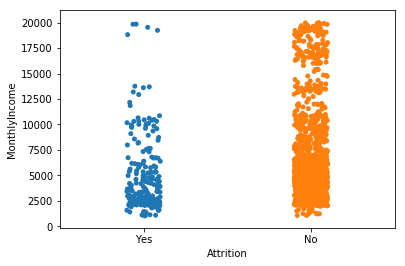

In [246]:
sns.stripplot(data=hr_data,x='Attrition',y='MonthlyIncome',jitter=True);


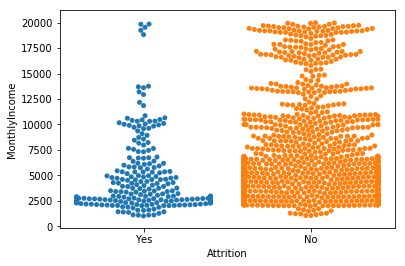

In [247]:
sns.swarmplot(data=hr_data,x='Attrition',y='MonthlyIncome');

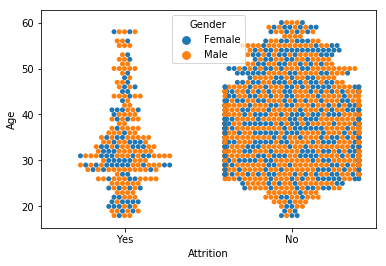

In [252]:
sns.swarmplot(data=hr_data,x='Attrition',y='Age',hue='Gender');

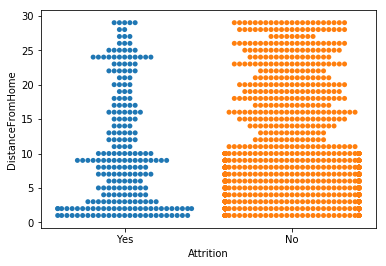

In [251]:
sns.swarmplot(data=hr_data,x='Attrition',y='DistanceFromHome');

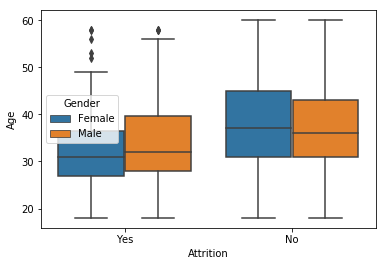

In [253]:
sns.boxplot(data=hr_data,x='Attrition',y='Age',hue='Gender');

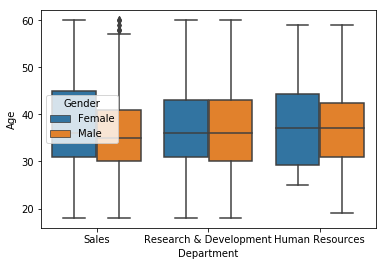

In [259]:
sns.boxplot(data=hr_data,x='Department',y='Age',hue='Gender');

# plot to visualize all the individual obs instead of the summary boxplot values

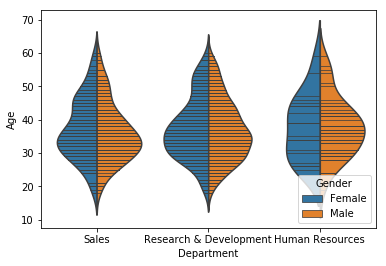

In [264]:
sns.violinplot(data=hr_data,x='Department',y='Age',hue='Gender',split=True,inner="stick");

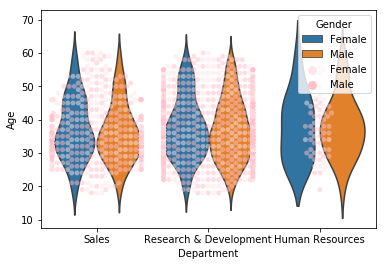

In [271]:
sns.violinplot(data=hr_data,x='Department',y='Age',hue='Gender',inner=None);
sns.swarmplot(data=hr_data,x='Department',y='Age',hue='Gender',color='pink',alpha=0.5)

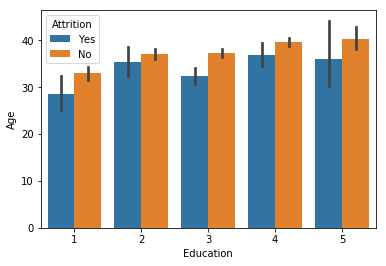

In [277]:
sns.barplot(data=hr_data,x='Education',y='Age',hue= 'Attrition');

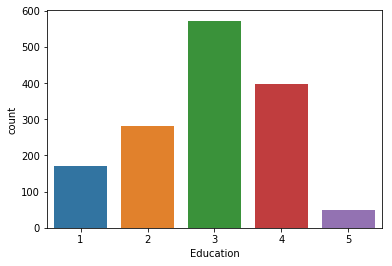

In [281]:
sns.countplot(data=hr_data,x='Education');

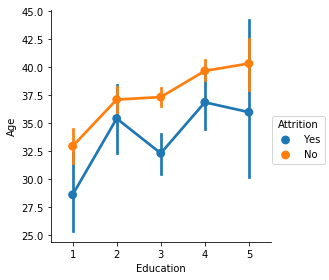

In [283]:
sns.factorplot(data=hr_data,x='Education',y='Age',hue='Attrition');

In [302]:
X = hr_data[hr_data.columns.difference(['Attrition'])]

In [313]:
hr_data.Attrition = hr_data.Attrition.astype('category')

In [315]:
y = hr_data.Attrition.cat.codes # setting target variable 

In [316]:
y[:10]

0    1
1    0
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int8

C:\Users\Suhasini\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead

C:\Users\Suhasini\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning:

Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0

C:\Users\Suhasini\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3239: UserWarning:

Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0



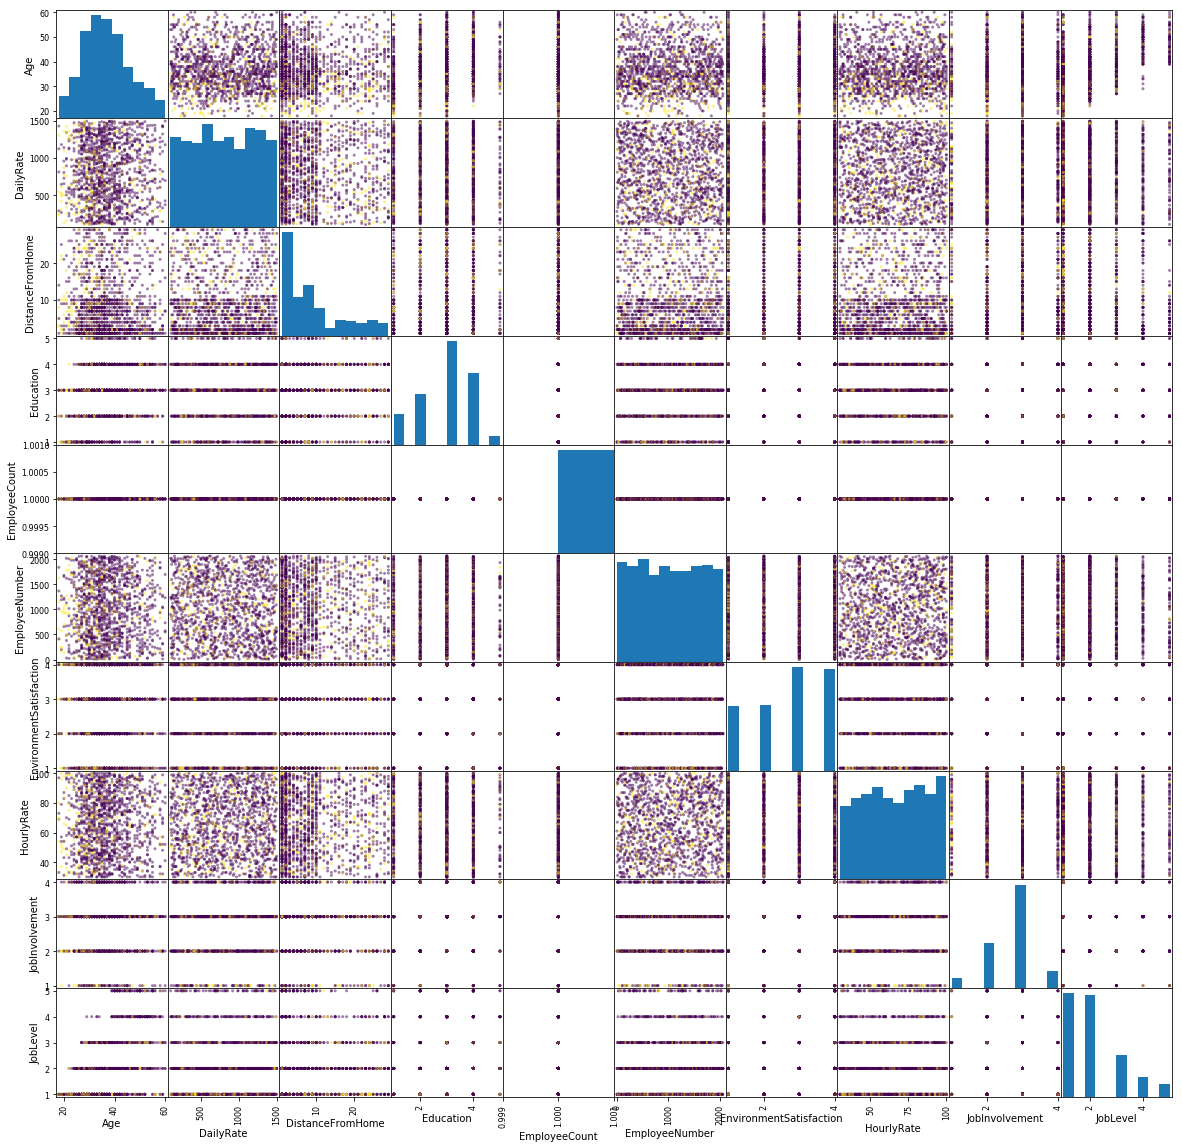

In [323]:
_  = pd.scatter_matrix(hr_data.iloc[:,:15],c=y , figsize=[20,20])

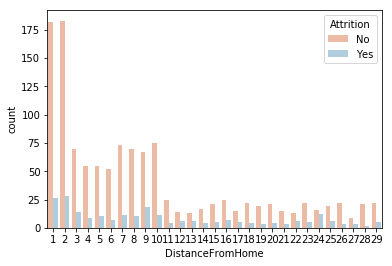

In [324]:
sns.countplot(x='DistanceFromHome',hue='Attrition',data=hr_data,palette='RdBu')
plt.show()

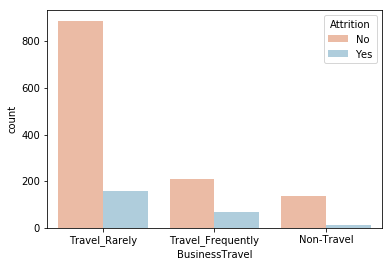

In [325]:
sns.countplot(x='BusinessTravel' , hue= 'Attrition' , data=hr_data,palette='RdBu')
plt.show()

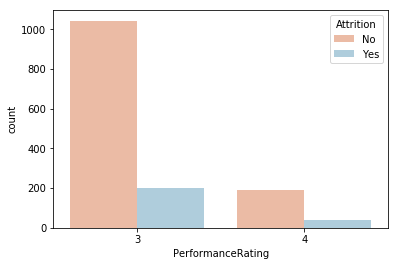

In [327]:
sns.countplot(x='PerformanceRating',hue='Attrition',data=hr_data,palette = 'RdBu')
plt.show()

In [328]:
hr_data.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

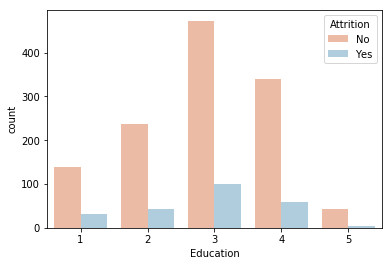

In [329]:
sns.countplot(x='Education',hue='Attrition',data=hr_data,palette = 'RdBu')
plt.show()

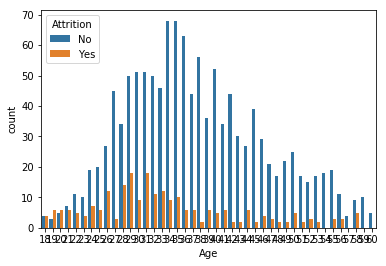

In [334]:
sns.countplot(x='Age',hue='Attrition',data=hr_data)
plt.show()